In [41]:
# Import libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

In [42]:
# Set random seed for analysis
set.seed(3456)

In [43]:
# Download zip file from online archive 
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"
temp <- tempfile()
download.file(url, temp)

# Read in CSV file containing pulsar data
pulsar_data <- read_csv(unz(temp, "HTRU_2.csv"), col_names = c("Profile_mean", "Profile_stdev", "Profile_skewness", "Profile_kurtosis", "DM_mean", "DM_stdev", "DM_skewness", "DM_kurtosis", "class")) %>%
               mutate(class = as_factor(class))
pulsar_data

unlink(temp)

Parsed with column specification:
cols(
  Profile_mean = col_double(),
  Profile_stdev = col_double(),
  Profile_skewness = col_double(),
  Profile_kurtosis = col_double(),
  DM_mean = col_double(),
  DM_stdev = col_double(),
  DM_skewness = col_double(),
  DM_kurtosis = col_double(),
  class = col_double()
)



Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


In [44]:
# Split pulsar dataset into training and testing data
pulsar_split <- initial_split(pulsar_data, prop = 0.75, strata = class)
pulsar_test <- testing(pulsar_split)
pulsar_train <- training(pulsar_split)   
pulsar_train

Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.23457141,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
130.38281,39.84406,-0.15832276,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25781,39.49649,0.46588196,1.16287712,4.0794314,24.980418,7.397080,57.78474,0
142.07812,45.28807,-0.32032843,0.28395251,5.3762542,29.009897,6.076266,37.83139,0
133.25781,44.05824,-0.08105986,0.11536151,1.6321070,12.007806,11.972067,195.54345,0
117.94531,45.50658,0.32543756,0.66145946,2.8361204,23.118350,8.943212,82.47559,0


In [45]:
# Report the number of observations in each class
n_by_class <- pulsar_train %>% 
              group_by(class) %>%
              summarize(n = n())
n_by_class

# Report the means of the predictor variables
mean_by_predictor <- pulsar_train %>% 
                     summarize(across(Profile_mean:DM_kurtosis, mean)) %>%
                     pivot_longer(cols = Profile_mean:DM_kurtosis, names_to = "predictor", values_to = "mean")
mean_by_predictor

# Report how many rows have missing data
num_NAs <- pulsar_train %>% 
           filter(is.na(pulsar_train)) %>% 
           summarize(NAs = n())
num_NAs

`summarise()` ungrouping output (override with `.groups` argument)



class,n
<fct>,<int>
0,12188
1,1236


predictor,mean
<chr>,<dbl>
Profile_mean,111.1759122
Profile_stdev,46.5244190
Profile_skewness,0.4783363
Profile_kurtosis,1.7837384
DM_mean,12.7606798
DM_stdev,26.3566054
DM_skewness,8.3021751
DM_kurtosis,105.1094153


NAs
<int>
0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



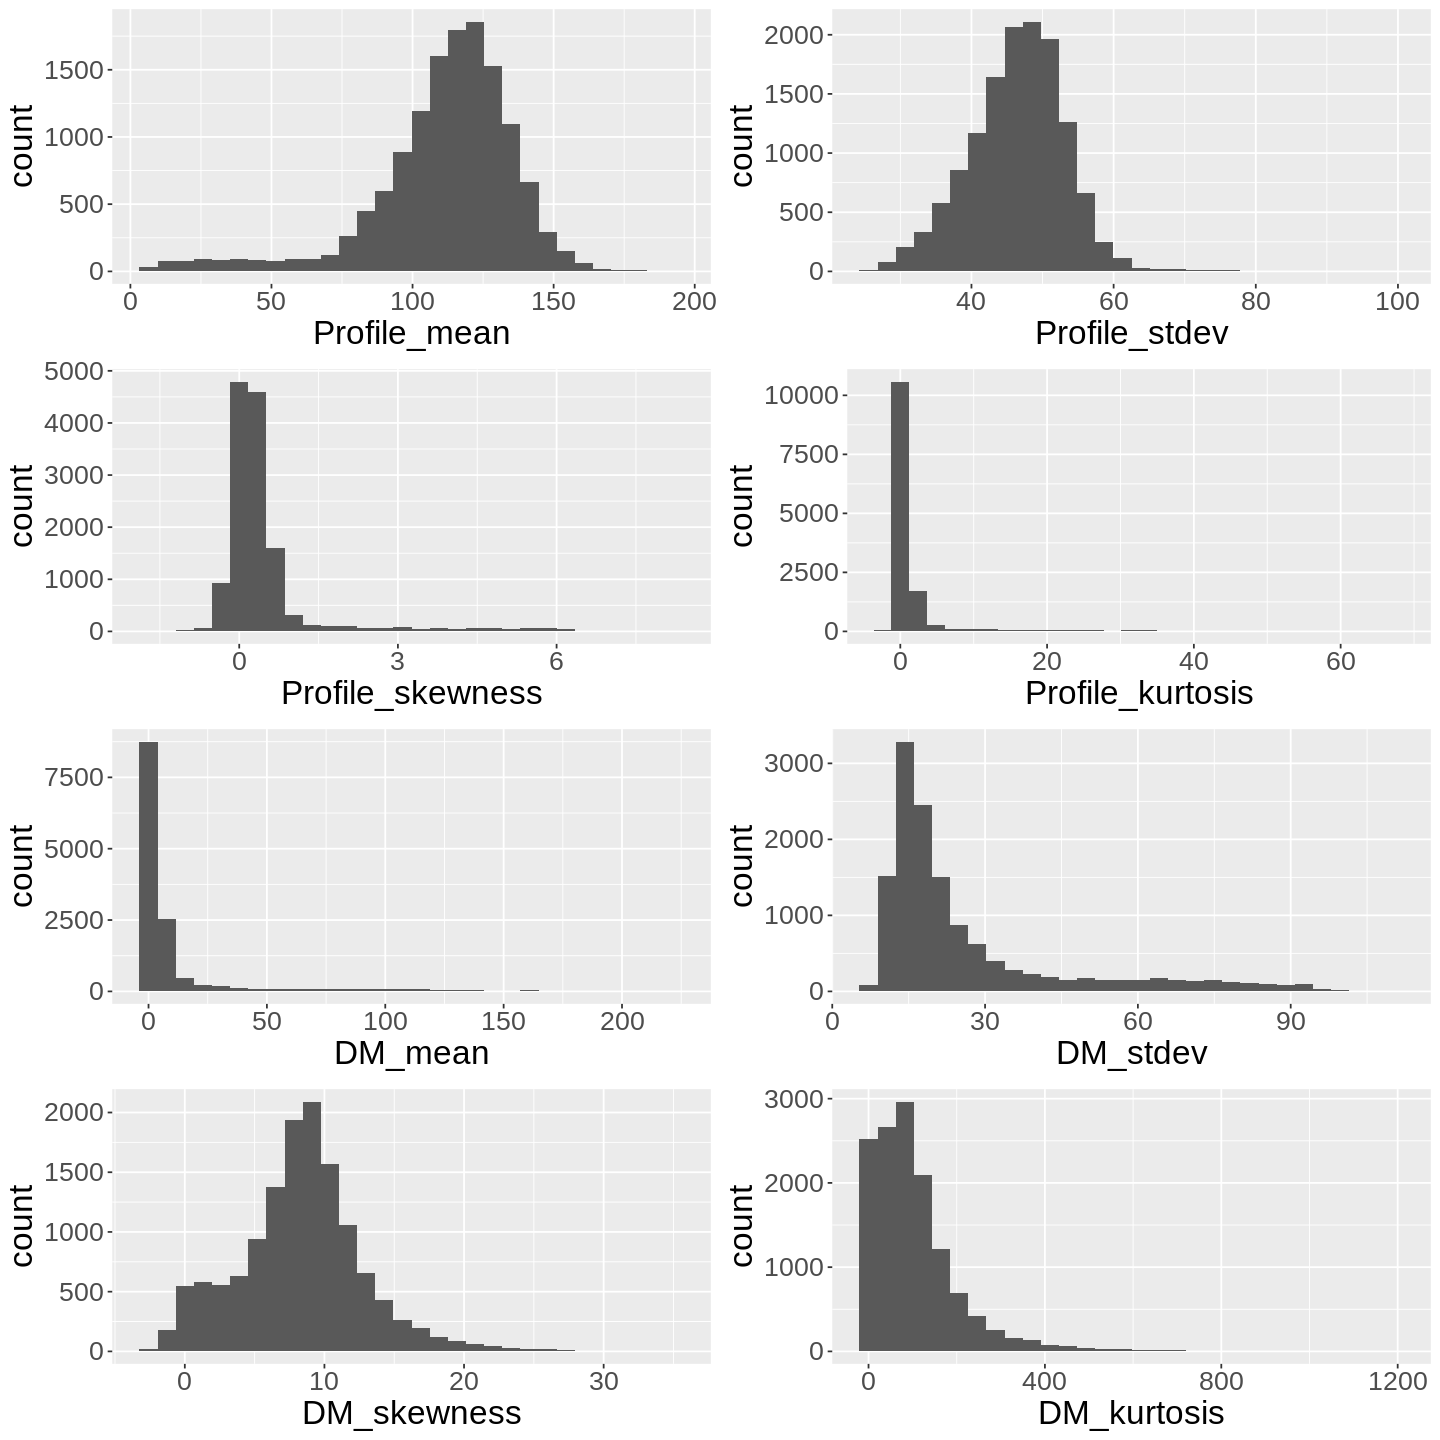

In [46]:
# Compare the distributions of each of the predictor variables
options(repr.plot.width = 12, repr.plot.height = 12) 

Profile_mean_plot <- pulsar_train %>% 
                     ggplot(aes(x = Profile_mean), fill = "blue") + 
                     geom_histogram()  + 
                     xlab("Profile_mean") +
                     theme(text = element_text(size = 20))

Profile_stdev_plot <- pulsar_train %>% 
                      ggplot(aes(x = Profile_stdev), fill = "red") + 
                      geom_histogram()  + 
                      xlab("Profile_stdev") +
                      theme(text = element_text(size = 20))

Profile_skewness_plot <- pulsar_train %>% 
                         ggplot(aes(x = Profile_skewness), fill = "green") + 
                         geom_histogram()  + 
                         xlab("Profile_skewness") +
                         theme(text = element_text(size = 20))

Profile_kurtosis_plot <- pulsar_train %>% 
                         ggplot(aes(x = Profile_kurtosis), fill = "yellow") + 
                         geom_histogram()  + 
                         xlab("Profile_kurtosis") +
                         theme(text = element_text(size = 20))

DM_mean_plot <- pulsar_train %>% 
                ggplot(aes(x = DM_mean), fill = "orange") + 
                geom_histogram()  + 
                xlab("DM_mean") +
                theme(text = element_text(size = 20))

DM_stdev_plot <- pulsar_train %>% 
                 ggplot(aes(x = DM_stdev), fill = "purple") + 
                 geom_histogram()  + 
                 xlab("DM_stdev") +
                 theme(text = element_text(size = 20))

DM_skewness_plot <- pulsar_train %>% 
                    ggplot(aes(x = DM_skewness), fill = "brown") + 
                    geom_histogram()  + 
                    xlab("DM_skewness") +
                    theme(text = element_text(size = 20))

DM_kurtosis_plot <- pulsar_train %>% 
                    ggplot(aes(x = DM_kurtosis), fill = "black") + 
                    geom_histogram()  + 
                    xlab("DM_kurtosis") +
                    theme(text = element_text(size = 20))

plot_grid(Profile_mean_plot, 
          Profile_stdev_plot, 
          Profile_skewness_plot, 
          Profile_kurtosis_plot, 
          DM_mean_plot, 
          DM_stdev_plot, 
          DM_skewness_plot, 
          DM_kurtosis_plot, 
          nrow = 4)